# <font color='#3d59c6'> MD004 SESIÓN PCA </font>



**MODELO**: Regresión Lineal Multiple con PCA
- Modelaremos la relación entre una variable dependiente (la que queremos predecir) y varias variables explicativas + un error (la diferencia entre la predicción y el real)

1. Recordad que **el análisis de regresión es un proceso estadístico para encontrar las relaciones dentro de un conjunto de datos**, es decir <u>encontrar la mejor línea recta</u> a través de puntos de observación.

2. Con el enfoque clave en las relaciones entre las variables independientes (predictores) y una variable dependiente (target).

3. Este método **asume que existe una relación lineal entre los predictores y el resultado**.
Por último, la regresión lineal tiene la <u>ventaja de la interpretabilidad</u>, pero hay que realizar algunas <u>comprobaciones importantes</u>.

**DATA**: En este ejemplo utilizaremos el dataset: **202512S1_SerieMacroeconomica.csv**

**OBJETIVO:** Predecir la <font color='#C90076'> **morosidad** </font> partiendo de las diferentes series macroeconómicas. Existe una necesidad en las compañias de estimar la morosidad (el impago) a 'x' años vista. Una parte de esta morosidad viene dada por el propio perfil de cliente y una parte de la morosidad viene dada por el contexto macroeconomico (guerras, crisi semiconductores, etc). 

Se necesita generar modelos que dados 'x' escenarios macroeconomicos nos permita estimar el impacto sobre nuestra morosidad.

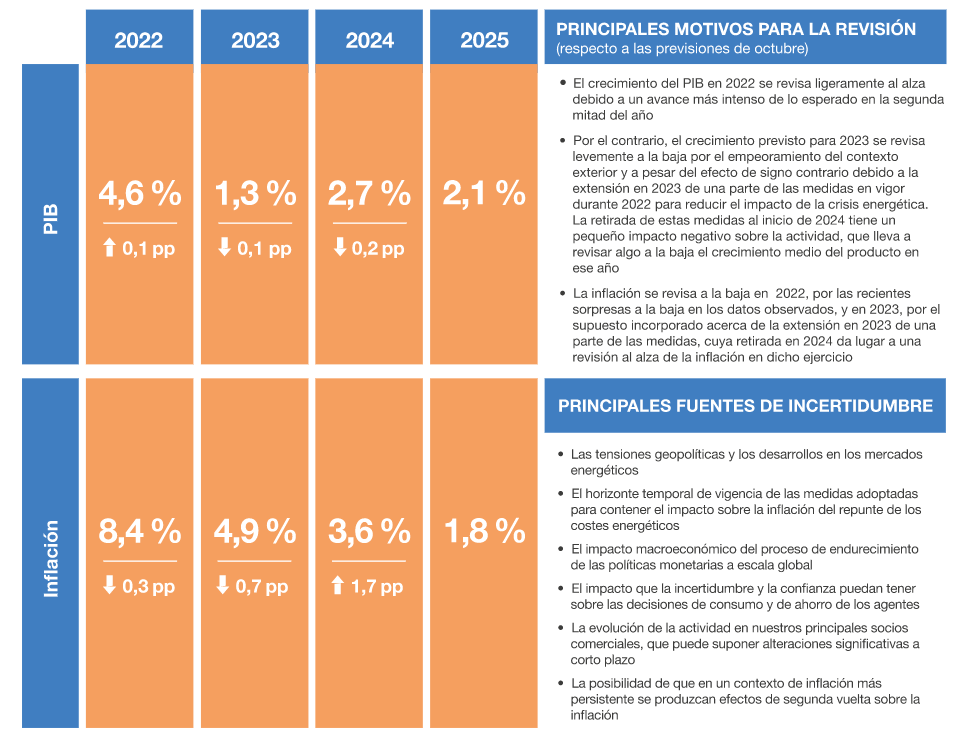

**PASOS:** 

0. Plantear estrategia
1. Realizar análisis descriptivo
2. Realizar análisis correlaciones y PCA para la selección de variables
    - Interpretar la salida de las funciones pca
3. Crear modelo regresión lineal multiple
    - Interpretar la salida del modelo
4. Validar modelo

**Fuente datos:** https://www.bde.es/bde/es/areas/estadis/

## <font color='#3d59c6'>  CARGA DE PACKAGES </font>

In [1]:
library(dplyr)
library(MASS)
library(class)
library(corrplot)
library(ggplot2)
# install.packages('gridExtra')
library(gridExtra)
# install.packages ('GGally')
library(GGally)
# install.packages('nortest')
library(nortest)

library(caret)
library(MASS)
library(lmtest)
# install.packages("olsrr")
library(olsrr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


corrplot 0.95 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: lattice

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘olsrr’


The following object is masked from ‘package:MASS’:

    cement


The following object is masked from ‘package:datasets’:

    rivers




## <font color='#3d59c6'>  CARGA DE DATOS </font>

- Variable dependiente (target) **Morosidad_prct**
- Variables explicativas o predictoras:

    - **PIB**
    - **Tasa de paro**
    - **IPC**
    - **Precio medio m2 viviendas**
    - **Precio de la vivienda x Renta bruta por hogar**
    - **Tipo de cambio EUR a USD**
    - **Renta disponible bruta_hogares mm€**
    
A estas variables les añadiremos:

- variaciones intertrimestrales 
- variaciones interanuales
- lags: 3meses, 6meses, 9meses y 12meses


In [2]:
list.files()

[1] "202512S1_SerieMacroeconomica_2010.csv"
[2] "Analisis de factores"                 
[3] "Analisis de factores.txt"             
[4] "MD004 - 6.Análisis de Factores.pdf"   
[5] "MD004_202512S1_SeriesMacro_2010.ipynb"

In [3]:
# subimos el fichero 202512S1_SerieMacroeconomica.csv a nuestro entorno jupyter
# carpeta donde vayamos a desarrollar el código
# cargamos nuestro dataset en data_ab y checkeamos los datos cargados

data_macro <- read.csv(file = "202512S1_SerieMacroeconomica_2010.csv", header = TRUE, sep = ";", dec = ",")
head(data_macro) # de forma predefinida retorna las primeras 6 observations
tail(data_macro) # de forma predefinida retorna las últimas 6 observations

,CODMES,efecto_pandemia,efecto_crisi2008,Morosidad_prct,PIB,PIB_vartri,PIB_varanual,PIB_lag3,PIB_lag6,PIB_lag9,⋯,Tipo_cambio_EUR_USD_lag6,Tipo_cambio_EUR_USD_lag9,Tipo_cambio_EUR_USD_lag12,Renta_dispo_hogares_mm,Renta_dispo_hogares_mm_vartri,Renta_dispo_hogares_mm_varanual,Renta_dispo_hogares_mm_lag3,Renta_dispo_hogares_mm_lag6,Renta_dispo_hogares_mm_lag9,Renta_dispo_hogares_mm_lag12
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,2010_01,0,1,5.31,99.98,-0.02,0.16,100.00,100.03,99.82,⋯,1.4088,1.3190,1.32,157478,-14.34,1.77,183842,161612,186909,154738
2,2010_02,0,1,5.40,99.98,-0.02,0.16,100.00,100.03,99.82,⋯,1.4268,1.3650,1.28,157478,-14.34,1.77,183842,161612,186909,154738
3,2010_03,0,1,5.33,99.98,-0.02,0.16,100.00,100.03,99.82,⋯,1.4562,1.4016,1.31,157478,-14.34,1.77,183842,161612,186909,154738
4,2010_04,0,1,5.49,100.13,0.15,0.31,99.98,100.00,100.03,⋯,1.4816,1.4088,1.32,187501,19.06,0.32,157478,183842,161612,186909
5,2010_05,0,1,5.50,100.13,0.15,0.31,99.98,100.00,100.03,⋯,1.4914,1.4268,1.37,187501,19.06,0.32,157478,183842,161612,186909
6,2010_06,0,1,5.35,100.13,0.15,0.31,99.98,100.00,100.03,⋯,1.4614,1.4562,1.40,187501,19.06,0.32,157478,183842,161612,186909


,CODMES,efecto_pandemia,efecto_crisi2008,Morosidad_prct,PIB,PIB_vartri,PIB_varanual,PIB_lag3,PIB_lag6,PIB_lag9,⋯,Tipo_cambio_EUR_USD_lag6,Tipo_cambio_EUR_USD_lag9,Tipo_cambio_EUR_USD_lag12,Renta_dispo_hogares_mm,Renta_dispo_hogares_mm_vartri,Renta_dispo_hogares_mm_varanual,Renta_dispo_hogares_mm_lag3,Renta_dispo_hogares_mm_lag6,Renta_dispo_hogares_mm_lag9,Renta_dispo_hogares_mm_lag12
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
148,2022_04,1,0,4.19,109.48,1.95,7.62,107.39,107.27,104.89,⋯,1.1601,1.1822,1.20,223571,21.51,5.11,184001,214406,183578,212695
149,2022_05,1,0,4.18,109.48,1.95,7.62,107.39,107.27,104.89,⋯,1.1414,1.1772,1.21,223571,21.51,5.11,184001,214406,183578,212695
150,2022_06,1,0,3.88,109.48,1.95,7.62,107.39,107.27,104.89,⋯,1.1304,1.1770,1.20,223571,21.51,5.11,184001,214406,183578,212695
151,2022_07,1,0,3.85,109.54,0.05,4.43,109.48,107.39,107.27,⋯,1.1314,1.1601,1.18,186600,-16.54,1.65,223571,184001,214406,183578
152,2022_08,1,0,3.86,109.54,0.05,4.43,109.48,107.39,107.27,⋯,1.1342,1.1414,1.18,186600,-16.54,1.65,223571,184001,214406,183578
153,2022_09,1,0,3.79,109.54,0.05,4.43,109.48,107.39,107.27,⋯,1.1019,1.1304,1.18,186600,-16.54,1.65,223571,184001,214406,183578


## <font color='#3d59c6'>  EXPLORACION & PREPROCESAMIENTO </font>

In [4]:
str(data_macro)

'data.frame':	153 obs. of  54 variables:
 $ CODMES                                    : chr  "2010_01" "2010_02" "2010_03" "2010_04" ...
 $ efecto_pandemia                           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ efecto_crisi2008                          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Morosidad_prct                            : num  5.31 5.4 5.33 5.49 5.5 5.35 5.48 5.64 5.51 5.68 ...
 $ PIB                                       : num  100 100 100 100 100 ...
 $ PIB_vartri                                : num  -0.02 -0.02 -0.02 0.15 0.15 0.15 -0.05 -0.05 -0.05 0.06 ...
 $ PIB_varanual                              : num  0.16 0.16 0.16 0.31 0.31 0.31 0.05 0.05 0.05 0.14 ...
 $ PIB_lag3                                  : num  100 100 100 100 100 ...
 $ PIB_lag6                                  : num  100 100 100 100 100 ...
 $ PIB_lag9                                  : num  99.8 99.8 99.8 100 100 ...
 $ PIB_lag12                                 : num  99.8 99.8 99.8 99.8 99.8 ...
 

In [5]:
sum(is.na(data_macro)) # Núm de NA #comprobar si existen valores nulls

[1] 0

In [6]:
summary(data_macro)

    CODMES          efecto_pandemia  efecto_crisi2008 Morosidad_prct  
 Length:153         Min.   :0.0000   Min.   :0.0000   Min.   : 3.790  
 Class :character   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 5.230  
 Mode  :character   Median :0.0000   Median :0.0000   Median : 7.420  
                    Mean   :0.1961   Mean   :0.3464   Mean   : 7.887  
                    3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:10.400  
                    Max.   :1.0000   Max.   :1.0000   Max.   :13.620  
      PIB           PIB_vartri        PIB_varanual         PIB_lag3     
 Min.   : 86.30   Min.   :-17.8300   Min.   :-21.9400   Min.   : 86.30  
 1st Qu.: 97.46   1st Qu.: -0.0900   1st Qu.: -1.1700   1st Qu.: 97.46  
 Median :100.60   Median :  0.3700   Median :  1.9200   Median :100.47  
 Mean   :101.85   Mean   :  0.2451   Mean   :  0.7855   Mean   :101.67  
 3rd Qu.:107.14   3rd Qu.:  0.7800   3rd Qu.:  3.0200   3rd Qu.:106.56  
 Max.   :111.12   Max.   : 16.6400   Max.   : 17.8800   Max.   :1

### <font color='#3d59c6'>  VARIABLE OBJETIVO </font>

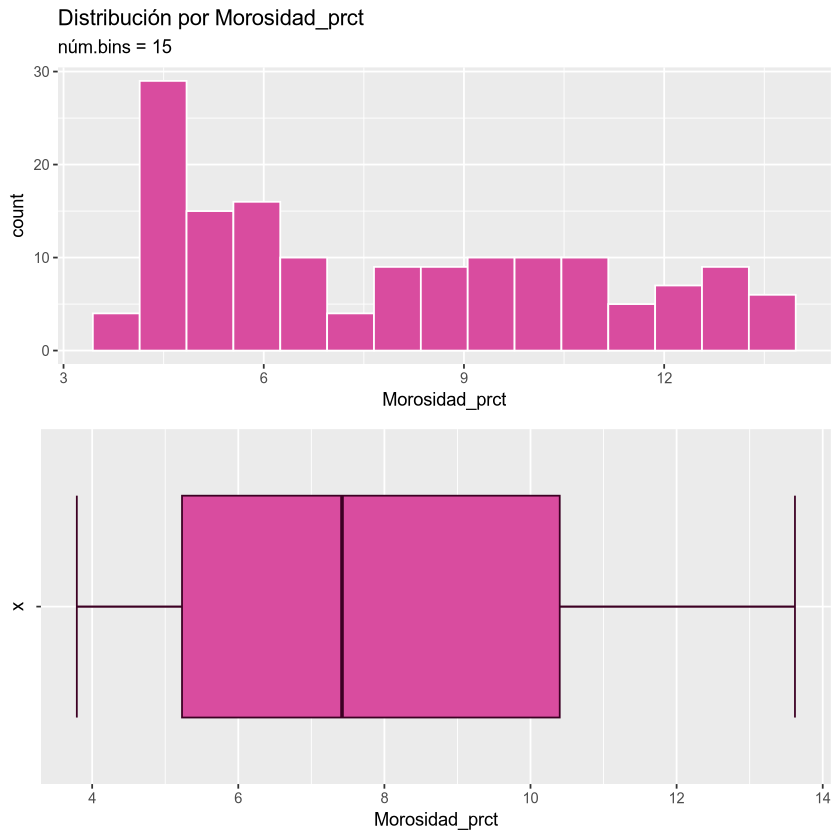

In [7]:
a <- ggplot(data_macro) + # señalamos el dataframe
  aes(x = Morosidad_prct) + # indicamos la variable
  geom_histogram(bins = 15, fill = "#d94c9f", color = "white") + # color del contorno
  labs(title = "Distribución por Morosidad_prct", subtitle = "núm.bins = 15", x = "Morosidad_prct") # nombre variable eje x
b <- ggplot(data = data_macro, aes(x = "", y = Morosidad_prct)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip() # Boxplot horizontal
grid.arrange(a, b)

### <font color='#3d59c6'>  VARIABLES EXPLICATIVAS </font>

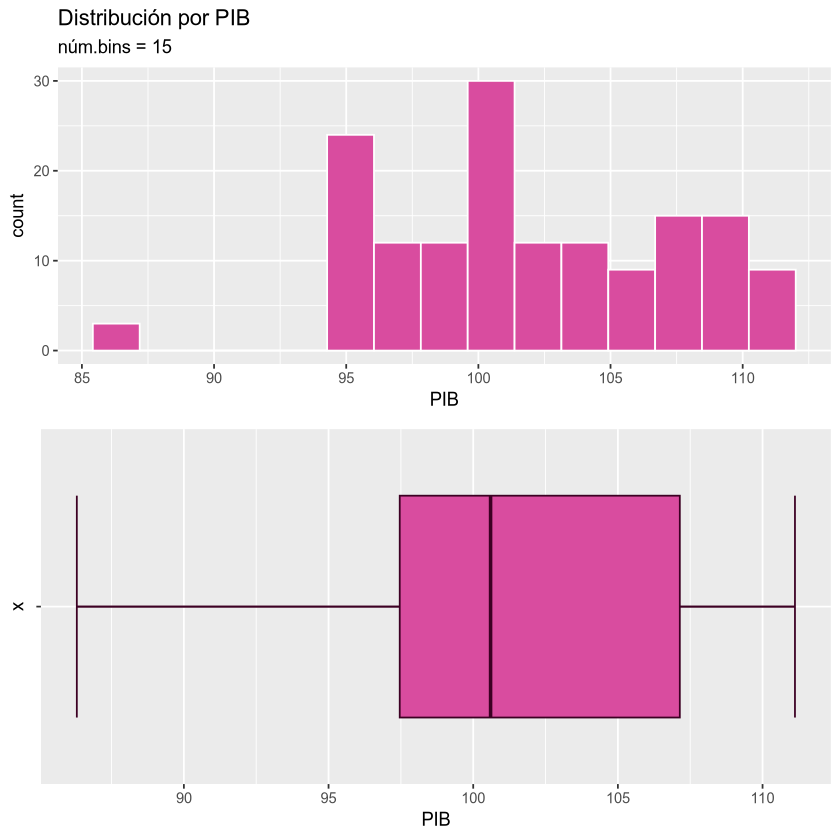

In [8]:
a <- ggplot(data_macro) +
  aes(x = PIB) +
  geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por PIB", subtitle = "núm.bins = 15", x = "PIB")
b <- ggplot(data = data_macro, aes(x = "", y = PIB)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip() # Boxplot horizontal
grid.arrange(a, b)

no hi va haver producció (es un outlier pero no surt com a tal)

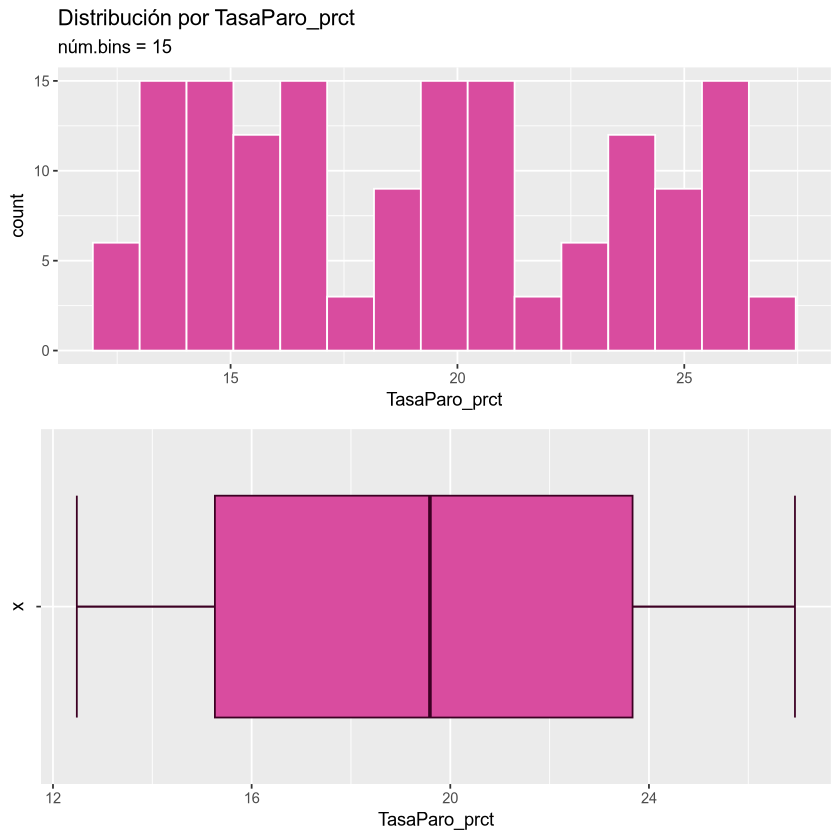

In [9]:
a <- ggplot(data_macro) +
  aes(x = TasaParo_prct) +
  geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por TasaParo_prct", subtitle = "núm.bins = 15", x = "TasaParo_prct")
b <- ggplot(data = data_macro, aes(x = "", y = TasaParo_prct)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip() # Boxplot horizontal
grid.arrange(a, b)

con los boxplots no vemos nada, con los histogramas si

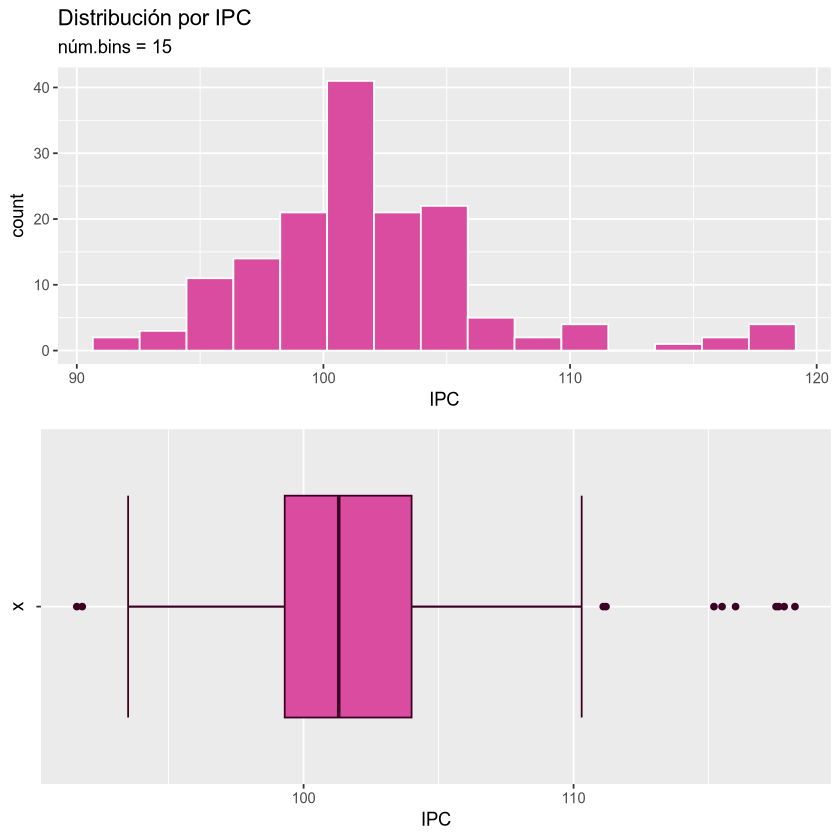

In [10]:
a <- ggplot(data_macro) +
  aes(x = IPC) +
  geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por IPC", subtitle = "núm.bins = 15", x = "IPC")
b <- ggplot(data = data_macro, aes(x = "", y = IPC)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip() # Boxplot horizontal
grid.arrange(a, b)

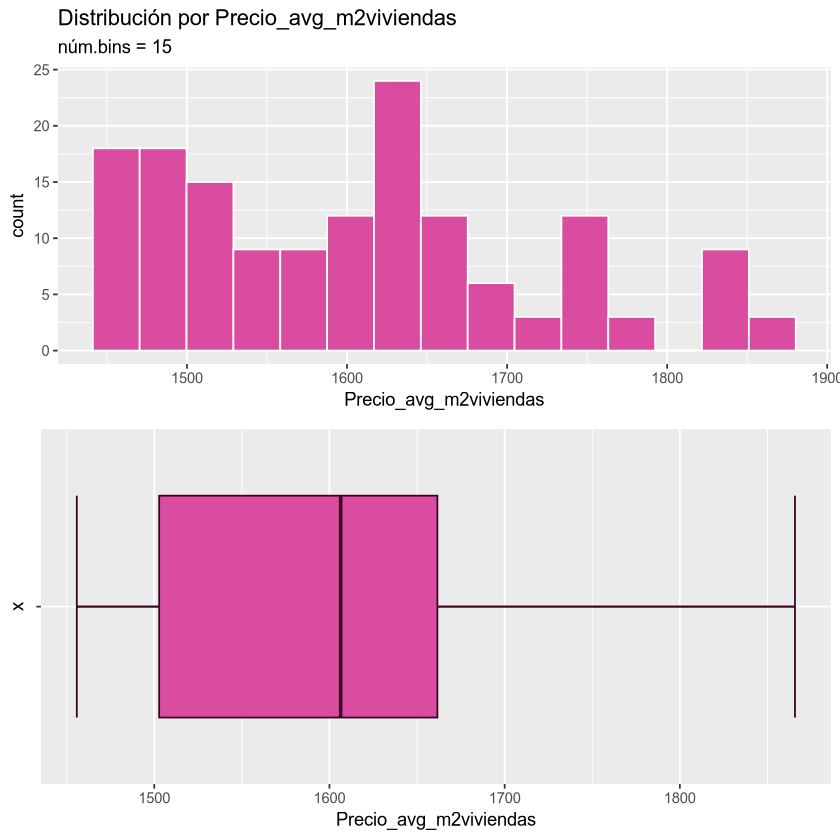

In [11]:
a <- ggplot(data_macro) +
  aes(x = Precio_avg_m2viviendas) +
  geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por Precio_avg_m2viviendas", subtitle = "núm.bins = 15", x = "Precio_avg_m2viviendas")
b <- ggplot(data = data_macro, aes(x = "", y = Precio_avg_m2viviendas)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip() # Boxplot horizontal
grid.arrange(a, b)

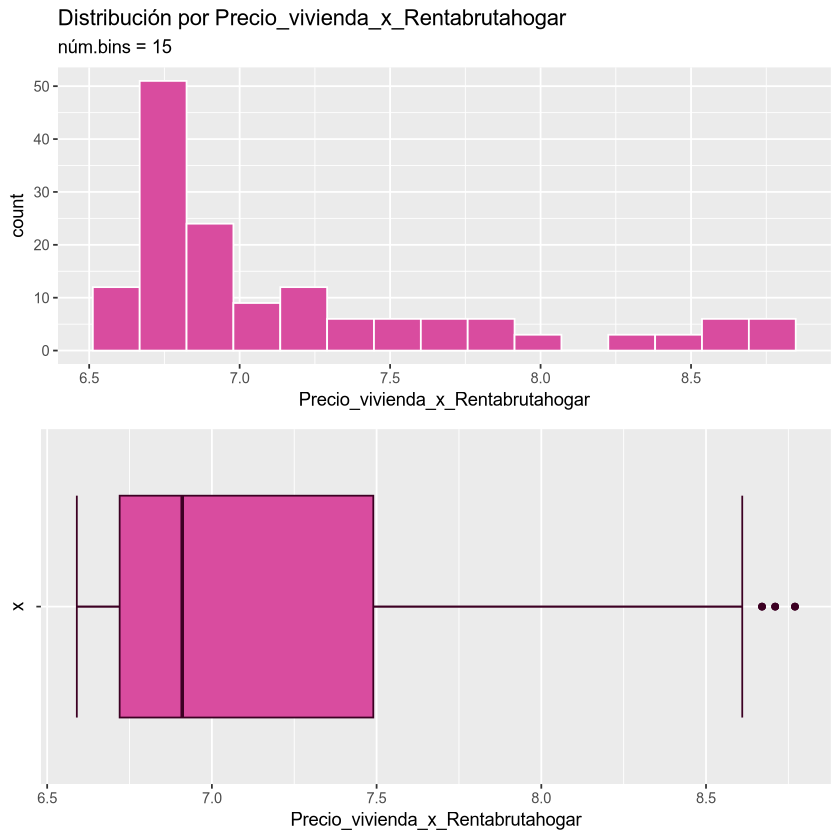

In [12]:
a <- ggplot(data_macro) +
  aes(x = Precio_vivienda_x_Rentabrutahogar) +
  geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por Precio_vivienda_x_Rentabrutahogar", subtitle = "núm.bins = 15", x = "Precio_vivienda_x_Rentabrutahogar")
b <- ggplot(data = data_macro, aes(x = "", y = Precio_vivienda_x_Rentabrutahogar)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip() # Boxplot horizontal
grid.arrange(a, b)

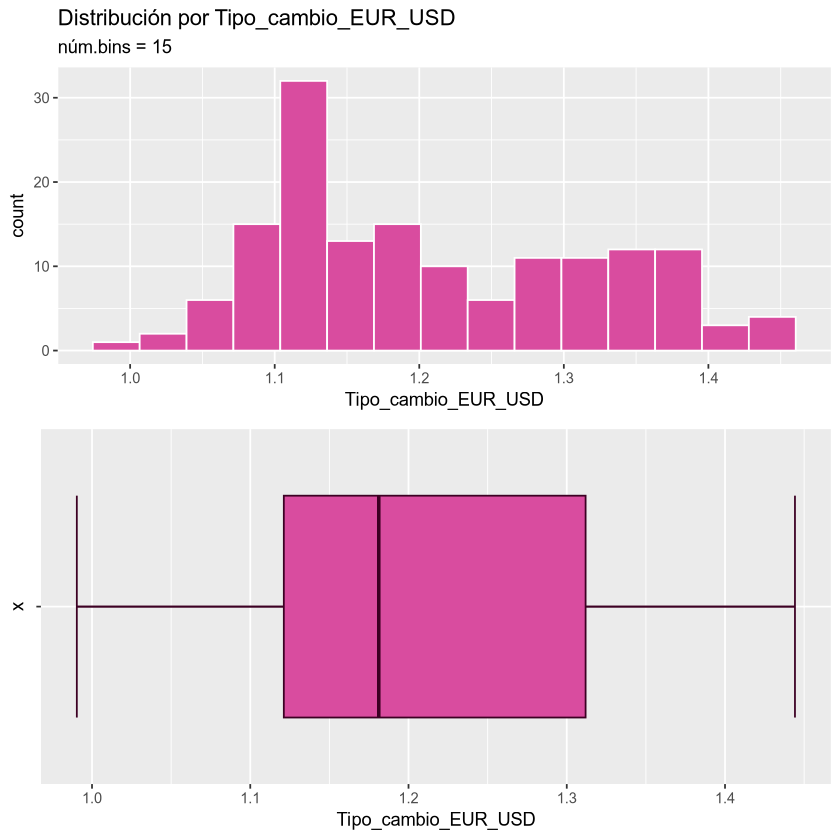

In [13]:
a <- ggplot(data_macro) +
  aes(x = Tipo_cambio_EUR_USD) +
  geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por Tipo_cambio_EUR_USD", subtitle = "núm.bins = 15", x = "Tipo_cambio_EUR_USD")
b <- ggplot(data = data_macro, aes(x = "", y = Tipo_cambio_EUR_USD)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip() # Boxplot horizontal
grid.arrange(a, b)

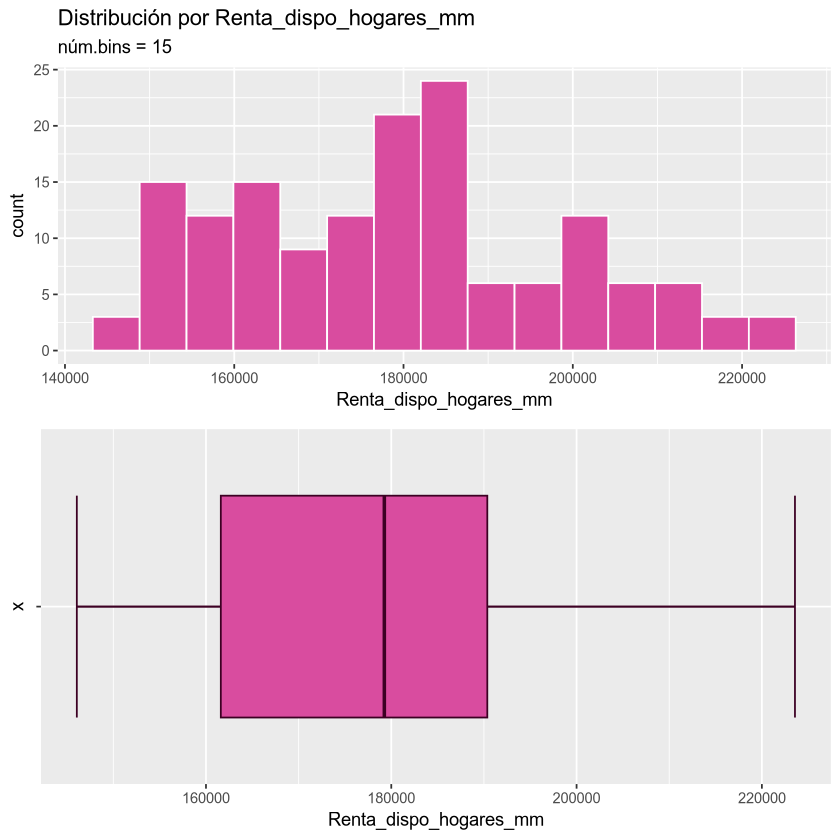

In [14]:
a <- ggplot(data_macro) +
  aes(x = Renta_dispo_hogares_mm) +
  geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
  labs(title = "Distribución por Renta_dispo_hogares_mm", subtitle = "núm.bins = 15", x = "Renta_dispo_hogares_mm")
b <- ggplot(data = data_macro, aes(x = "", y = Renta_dispo_hogares_mm)) +
  stat_boxplot(geom = "errorbar", color = "#3c0023") +
  geom_boxplot(fill = "#d94c9f", color = "#3c0023") +
  coord_flip() # Boxplot horizontal
grid.arrange(a, b)

## <font color='#3d59c6'>  ESTUDIO DE CORRELACIÓN Y PCA </font>

### <font color='#3d59c6'>  ANÁLISIS CORRELACIÓN </font>

Anotem variables que estan correlacionades
morosidad -> tasa de paro
    metro quadrado con la vivienda
    hem de mirar que entre elles no estiguin correlacionades

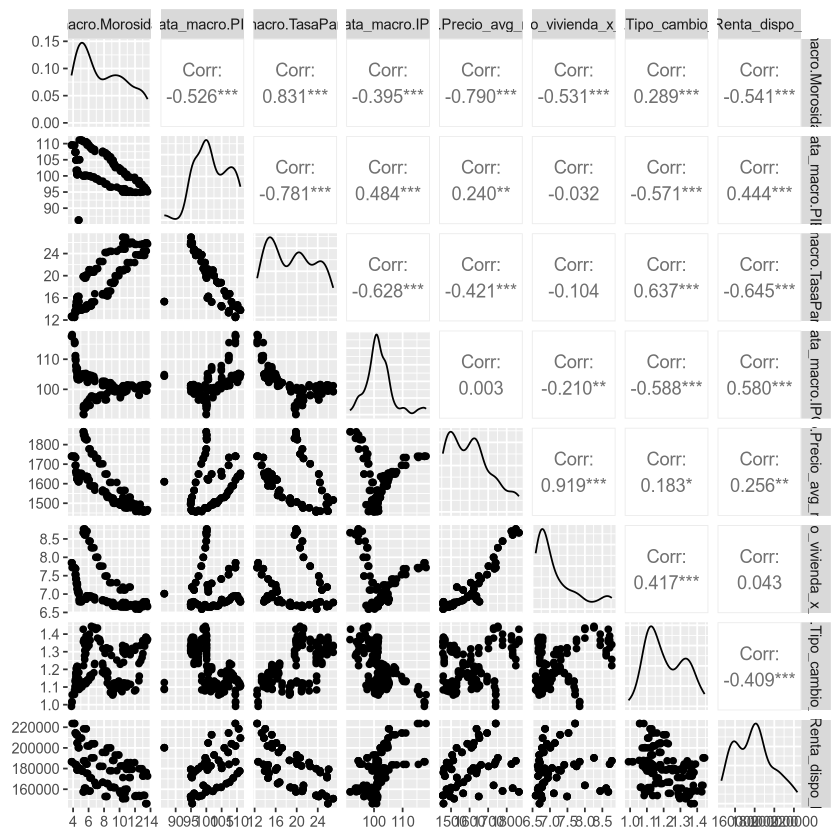

In [15]:
data_macro_key <- data.frame(
  data_macro$Morosidad_prct,
  data_macro$PIB,
  data_macro$TasaParo_prct #<<
  , data_macro$IPC #<<
  , data_macro$Precio_avg_m2viviendas #<<
  , data_macro$Precio_vivienda_x_Rentabrutahogar #<<
  , data_macro$Tipo_cambio_EUR_USD,
  data_macro$Renta_dispo_hogares_mm
)

ggpairs(data_macro_key)

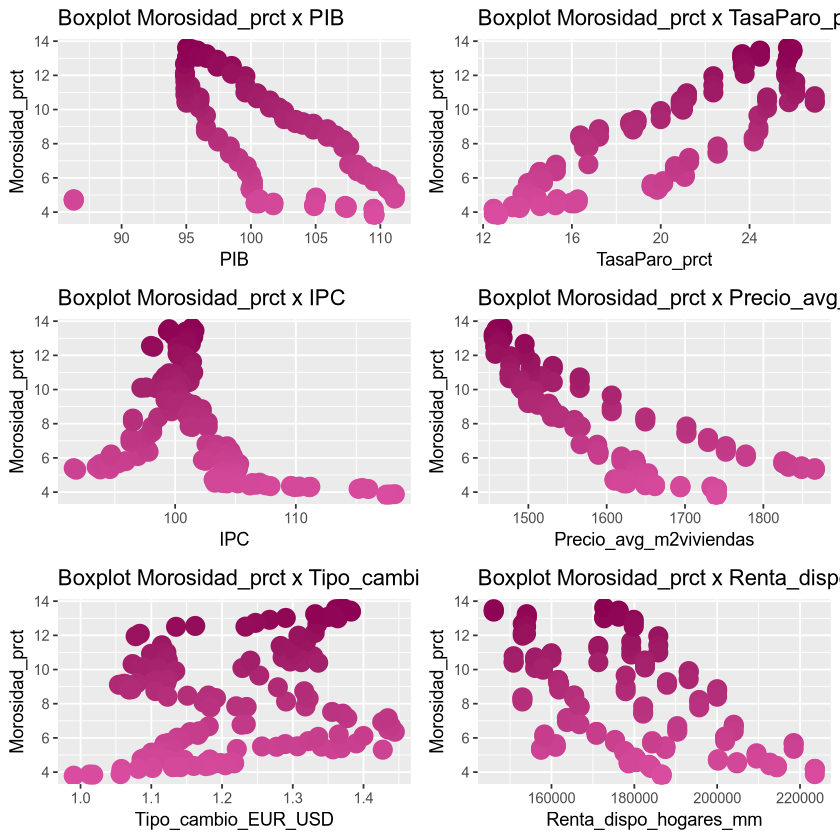

In [16]:
# PIB
a <- ggplot(data_macro) +
  aes(x = PIB, y = Morosidad_prct, color = Morosidad_prct) +
  geom_point(size = 5, show.legend = FALSE) +
  scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
  labs(title = "Boxplot Morosidad_prct x PIB ")
# TasaParo_prct
b <- ggplot(data_macro) +
  aes(x = TasaParo_prct, y = Morosidad_prct, color = Morosidad_prct) +
  geom_point(size = 5, show.legend = FALSE) +
  scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
  labs(title = "Boxplot Morosidad_prct x TasaParo_prct ")
# IPC
c <- ggplot(data_macro) +
  aes(x = IPC, y = Morosidad_prct, color = Morosidad_prct) +
  geom_point(size = 5, show.legend = FALSE) +
  scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
  labs(title = "Boxplot Morosidad_prct x IPC ")
# Precio_avg_m2viviendas
d <- ggplot(data_macro) +
  aes(x = Precio_avg_m2viviendas, y = Morosidad_prct, color = Morosidad_prct) +
  geom_point(size = 5, show.legend = FALSE) +
  scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
  labs(title = "Boxplot Morosidad_prct x Precio_avg_m2viviendas ")
# Tipo_cambio_EUR_USD
e <- ggplot(data_macro) +
  aes(x = Tipo_cambio_EUR_USD, y = Morosidad_prct, color = Morosidad_prct) +
  geom_point(size = 5, show.legend = FALSE) +
  scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
  labs(title = "Boxplot Morosidad_prct x Tipo_cambio_EUR_USD ")
# Renta_dispo_hogares_mm
f <- ggplot(data_macro) +
  aes(x = Renta_dispo_hogares_mm, y = Morosidad_prct, color = Morosidad_prct) +
  geom_point(size = 5, show.legend = FALSE) +
  scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
  labs(title = "Boxplot Morosidad_prct x Renta_dispo_hogares_mm ")
grid.arrange(a, b, c, d, e, f)

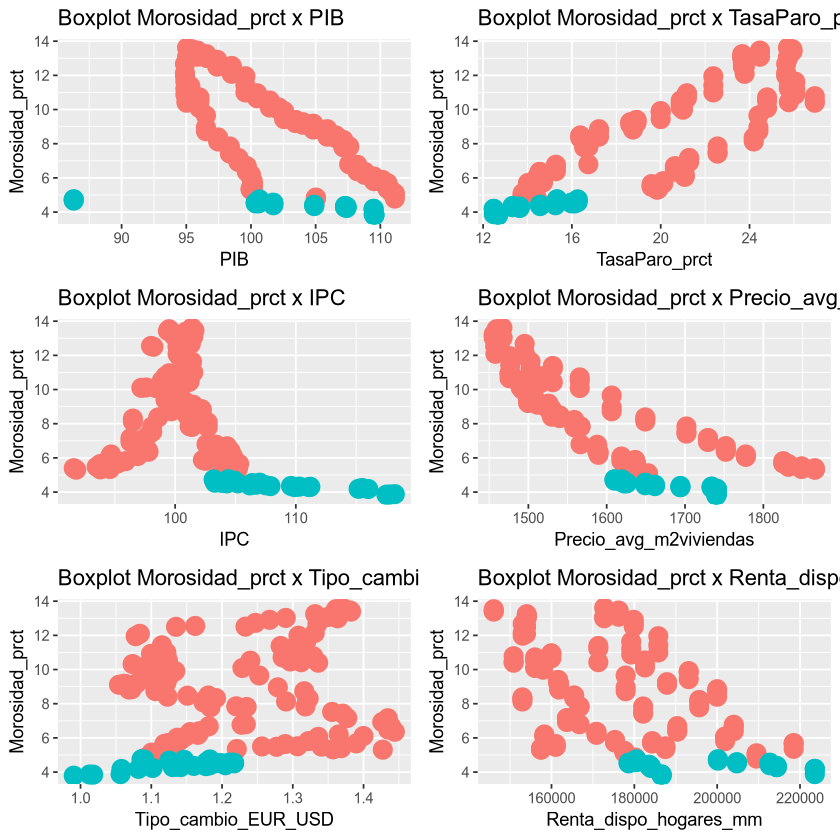

In [17]:
# PIB
a <- ggplot(data_macro) +
  aes(x = PIB, y = Morosidad_prct, color = efecto_pandemia > 0) +
  geom_point(size = 5, show.legend = FALSE) +
  labs(title = "Boxplot Morosidad_prct x PIB ")
# TasaParo_prct
b <- ggplot(data_macro) +
  aes(x = TasaParo_prct, y = Morosidad_prct, color = efecto_pandemia > 0) +
  geom_point(size = 5, show.legend = FALSE) +
  labs(title = "Boxplot Morosidad_prct x TasaParo_prct ")
# IPC
c <- ggplot(data_macro) +
  aes(x = IPC, y = Morosidad_prct, color = efecto_pandemia > 0) +
  geom_point(size = 5, show.legend = FALSE) +
  labs(title = "Boxplot Morosidad_prct x IPC ")
# Precio_avg_m2viviendas
d <- ggplot(data_macro) +
  aes(x = Precio_avg_m2viviendas, y = Morosidad_prct, color = efecto_pandemia > 0) +
  geom_point(size = 5, show.legend = FALSE) +
  labs(title = "Boxplot Morosidad_prct x Precio_avg_m2viviendas ")
# Tipo_cambio_EUR_USD
e <- ggplot(data_macro) +
  aes(x = Tipo_cambio_EUR_USD, y = Morosidad_prct, color = efecto_pandemia > 0) +
  geom_point(size = 5, show.legend = FALSE) +
  labs(title = "Boxplot Morosidad_prct x Tipo_cambio_EUR_USD ")
# Renta_dispo_hogares_mm
f <- ggplot(data_macro) +
  aes(x = Renta_dispo_hogares_mm, y = Morosidad_prct, color = efecto_pandemia > 0) +
  geom_point(size = 5, show.legend = FALSE) +
  labs(title = "Boxplot Morosidad_prct x Renta_dispo_hogares_mm ")
grid.arrange(a, b, c, d, e, f)

In [18]:
# Filtro el efecto de la pandemia (Se debería trabajar aparte)
data_macro <- filter(
  data_macro,
  data_macro$efecto_pandemia == 0
)

head(data_macro)

,CODMES,efecto_pandemia,efecto_crisi2008,Morosidad_prct,PIB,PIB_vartri,PIB_varanual,PIB_lag3,PIB_lag6,PIB_lag9,⋯,Tipo_cambio_EUR_USD_lag6,Tipo_cambio_EUR_USD_lag9,Tipo_cambio_EUR_USD_lag12,Renta_dispo_hogares_mm,Renta_dispo_hogares_mm_vartri,Renta_dispo_hogares_mm_varanual,Renta_dispo_hogares_mm_lag3,Renta_dispo_hogares_mm_lag6,Renta_dispo_hogares_mm_lag9,Renta_dispo_hogares_mm_lag12
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,2010_01,0,1,5.31,99.98,-0.02,0.16,100.00,100.03,99.82,⋯,1.4088,1.3190,1.32,157478,-14.34,1.77,183842,161612,186909,154738
2,2010_02,0,1,5.40,99.98,-0.02,0.16,100.00,100.03,99.82,⋯,1.4268,1.3650,1.28,157478,-14.34,1.77,183842,161612,186909,154738
3,2010_03,0,1,5.33,99.98,-0.02,0.16,100.00,100.03,99.82,⋯,1.4562,1.4016,1.31,157478,-14.34,1.77,183842,161612,186909,154738
4,2010_04,0,1,5.49,100.13,0.15,0.31,99.98,100.00,100.03,⋯,1.4816,1.4088,1.32,187501,19.06,0.32,157478,183842,161612,186909
5,2010_05,0,1,5.50,100.13,0.15,0.31,99.98,100.00,100.03,⋯,1.4914,1.4268,1.37,187501,19.06,0.32,157478,183842,161612,186909
6,2010_06,0,1,5.35,100.13,0.15,0.31,99.98,100.00,100.03,⋯,1.4614,1.4562,1.40,187501,19.06,0.32,157478,183842,161612,186909


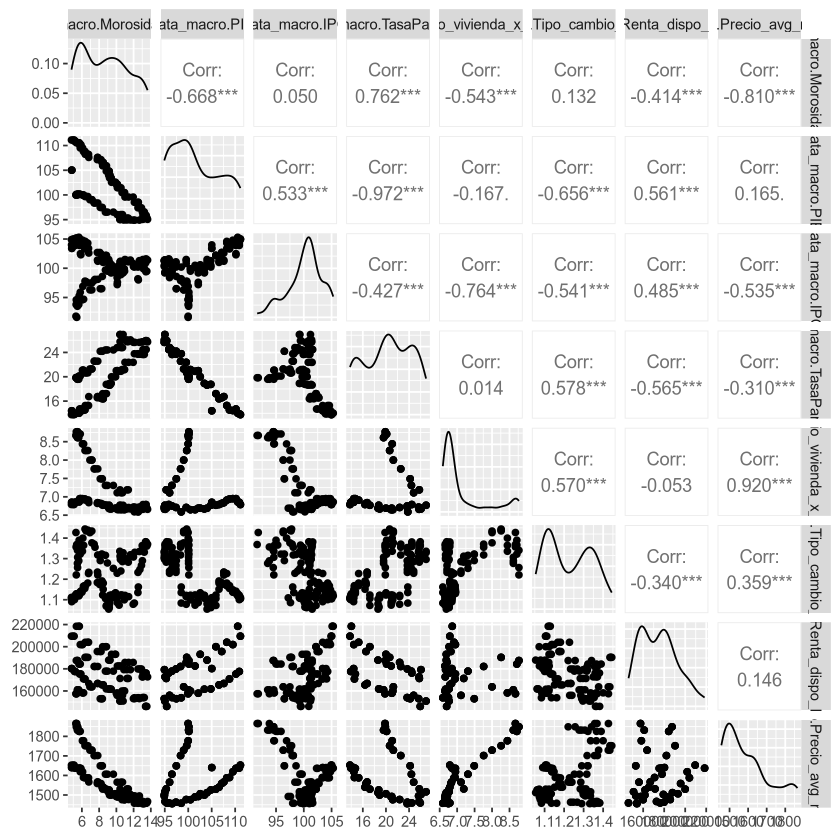

In [19]:
data_macro_key <- data.frame(
  data_macro$Morosidad_prct,
  data_macro$PIB,
  data_macro$IPC,
  data_macro$TasaParo_prct,
  data_macro$Precio_vivienda_x_Rentabrutahogar,
  data_macro$Tipo_cambio_EUR_USD,
  data_macro$Renta_dispo_hogares_mm,
  data_macro$Precio_avg_m2viviendas
)

ggpairs(data_macro_key)

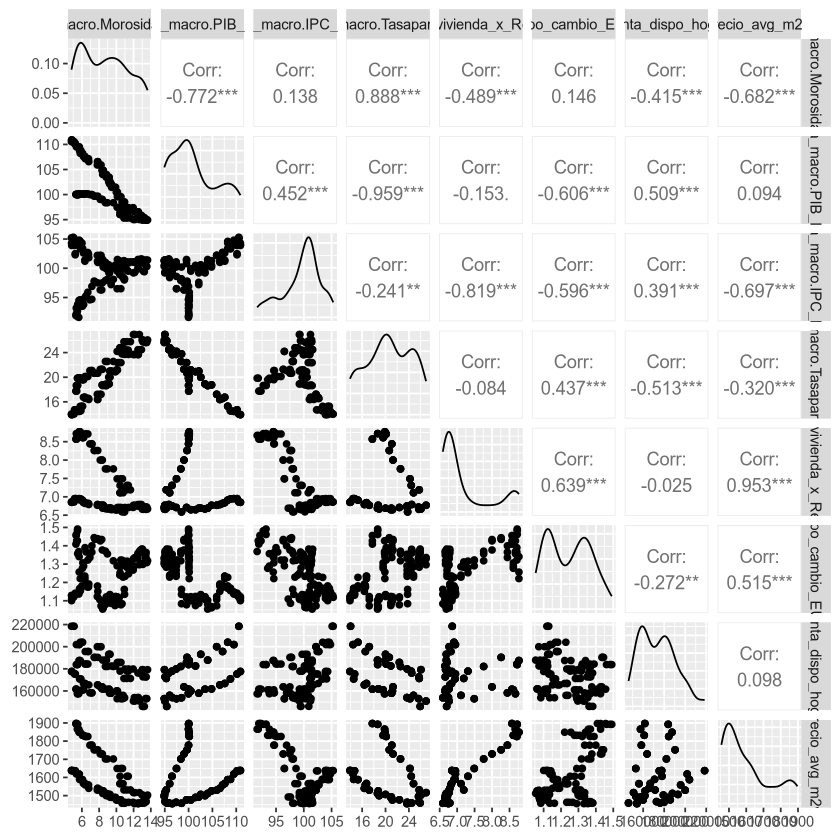

In [20]:
# vamos a trabajar con las variables numericas
data_macro_key_lag6 <- data.frame(
  data_macro$Morosidad_prct,
  data_macro$PIB_lag6,
  data_macro$IPC_lag6,
  data_macro$Tasaparo_lag6,
  data_macro$Precio_vivienda_x_Rentabrutahogar_lag6,
  data_macro$Tipo_cambio_EUR_USD_lag6,
  data_macro$Renta_dispo_hogares_mm_lag6,
  data_macro$Precio_avg_m2viviendas_lag6
)
ggpairs(data_macro_key_lag6)

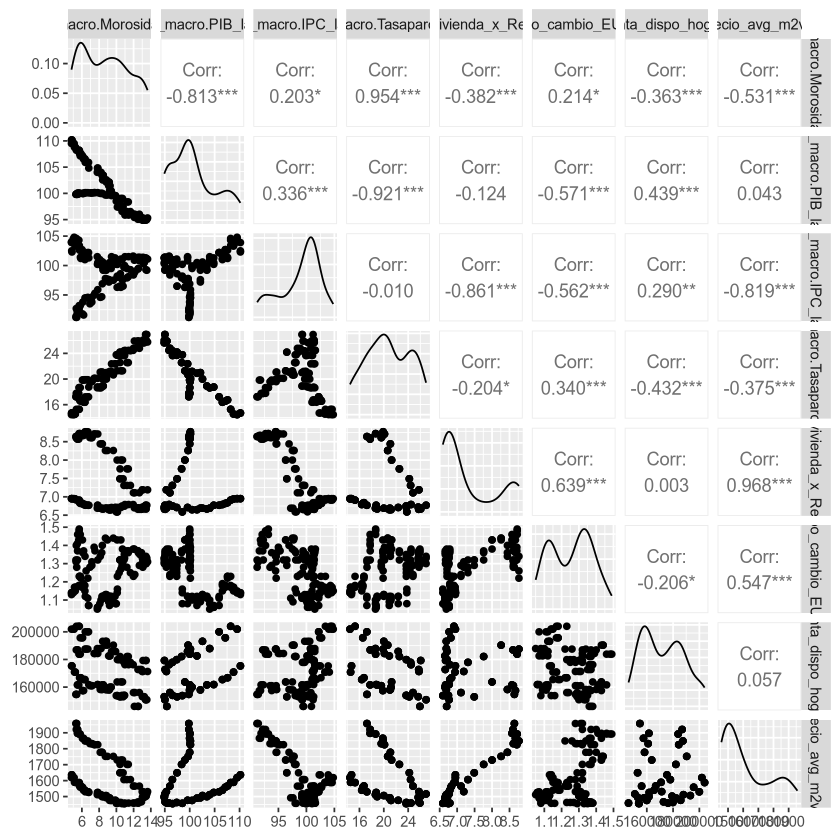

In [21]:
# vamos a trabajar con las variables numericas
data_macro_key_lag12 <- data.frame(
  data_macro$Morosidad_prct,
  data_macro$PIB_lag12,
  data_macro$IPC_lag12,
  data_macro$Tasaparo_lag12,
  data_macro$Precio_vivienda_x_Rentabrutahogar_lag12,
  data_macro$Tipo_cambio_EUR_USD_lag12,
  data_macro$Renta_dispo_hogares_mm_lag12,
  data_macro$Precio_avg_m2viviendas_lag12
)
ggpairs(data_macro_key_lag12)

### <font color='#3d59c6'>  >>PCA </font>
#### <font color='#3d59c6'>  >>PCA sin variables lag </font>

NO poner la variable objetivo en la PCA

In [22]:
data_macro_cor <- data.frame(
  data_macro$PIB,
  data_macro$TasaParo_prct #<<
  , data_macro$Precio_avg_m2viviendas #<<
  , data_macro$Precio_vivienda_x_Rentabrutahogar #<<
  , data_macro$Tipo_cambio_EUR_USD,
  data_macro$Renta_dispo_hogares_mm
)

round(cor(data_macro_cor), 2)
acp <- princomp(data_macro_cor, cor = TRUE)
summary(acp)
print("desviación estandard componente1:")
sd(predict(acp)[, 1:1])
print("varianza componente1:")
var(predict(acp)[, 1:1])

,data_macro.PIB,data_macro.TasaParo_prct,data_macro.Precio_avg_m2viviendas,data_macro.Precio_vivienda_x_Rentabrutahogar,data_macro.Tipo_cambio_EUR_USD,data_macro.Renta_dispo_hogares_mm
data_macro.PIB,1.00,-0.97,0.16,-0.17,-0.66,0.56
data_macro.TasaParo_prct,-0.97,1.00,-0.31,0.01,0.58,-0.56
data_macro.Precio_avg_m2viviendas,0.16,-0.31,1.00,0.92,0.36,0.15
data_macro.Precio_vivienda_x_Rentabrutahogar,-0.17,0.01,0.92,1.00,0.57,-0.05
data_macro.Tipo_cambio_EUR_USD,-0.66,0.58,0.36,0.57,1.00,-0.34
data_macro.Renta_dispo_hogares_mm,0.56,-0.56,0.15,-0.05,-0.34,1.00


Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.7194025 1.4739137 0.7707346 0.48599773 0.15731922
Proportion of Variance 0.4927242 0.3620703 0.0990053 0.03936563 0.00412489
Cumulative Proportion  0.4927242 0.8547944 0.9537997 0.99316534 0.99729023
                           Comp.6
Standard deviation     0.12750929
Proportion of Variance 0.00270977
Cumulative Proportion  1.00000000

[1] "desviación estandard componente1:"


[1] 1.726435

[1] "varianza componente1:"


[1] 2.980577

aqui mirem quina part de la varianza de les dades m'expliquen
per saber amb quantes components em quedo
1a 50
2a 36
3a 1
4a 4

hem de mirar a dins per explicar el component

In [23]:
# A través de esta función tendriamos las puntuaciones en las componentes principales
# Nos es útil para comparar  como para usar estas componentes sustituyendolas por las variables originales
predict(acp)
# acp$scores #otra forma de llamarlos

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
-1.8947270,3.25834982,0.8305582,0.325782686,0.075036561,-0.077189355
-1.6486665,3.12571946,0.9696655,-0.088459113,0.087434260,-0.076744323
-1.5995384,3.09923866,0.9974394,-0.171166093,0.089909569,-0.076655469
-0.8738566,3.34750824,-0.5023153,-0.510084764,-0.115592617,0.006732043
-0.5207220,3.15716330,-0.3026750,-1.104585366,-0.097800013,0.007370732
-0.3712382,3.07658923,-0.2181661,-1.356240794,-0.090268305,0.007641093
-1.1134865,2.72427784,0.9821814,-0.658045149,-0.054052308,-0.093082893
-1.1655539,2.75234296,0.9527457,-0.570389887,-0.056675712,-0.093177064
-1.2381963,2.79149834,0.9116782,-0.448096660,-0.060335784,-0.093308447
-1.1548613,3.22770261,-0.5005215,-0.094545898,-0.190437251,0.044782445


In [24]:
loadings(acp)


Loadings:
                                             Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
data_macro.PIB                                0.548  0.144  0.224  0.356       
data_macro.TasaParo_prct                     -0.523 -0.243 -0.233 -0.302  0.273
data_macro.Precio_avg_m2viviendas                    0.668  0.127 -0.167  0.707
data_macro.Precio_vivienda_x_Rentabrutahogar -0.213  0.617        -0.319 -0.652
data_macro.Tipo_cambio_EUR_USD               -0.474  0.256 -0.268  0.798       
data_macro.Renta_dispo_hogares_mm             0.394  0.167 -0.896 -0.120       
                                             Comp.6
data_macro.PIB                                0.708
data_macro.TasaParo_prct                      0.669
data_macro.Precio_avg_m2viviendas                  
data_macro.Precio_vivienda_x_Rentabrutahogar  0.204
data_macro.Tipo_cambio_EUR_USD                     
data_macro.Renta_dispo_hogares_mm                  

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS load

en 2 cortamos
pib i tasa de paro mas explicativas
del componente 3 el precio de la vivienda

podemos ver las que estan correlacionadas 

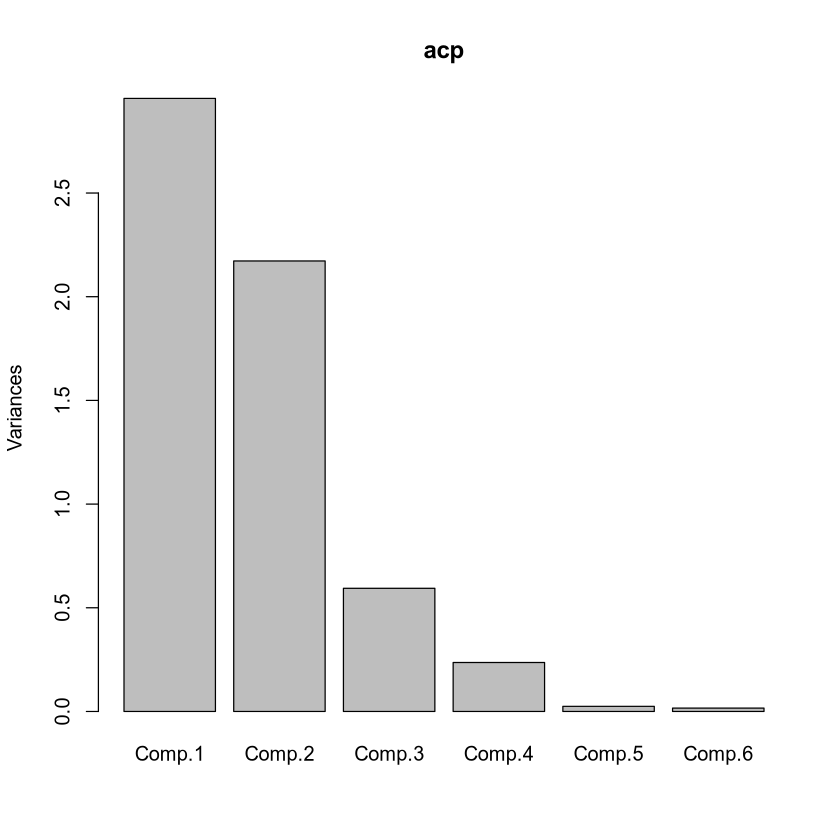

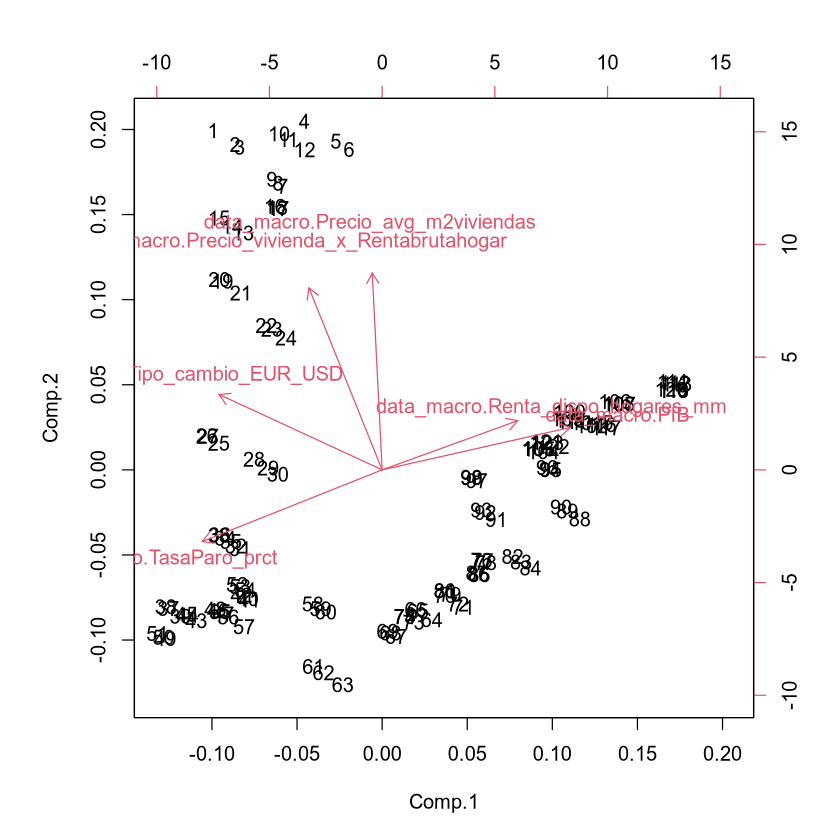

In [25]:
plot(acp)
biplot(acp)

**OBSERVACIONES**:
- En total tenemos 6 componentes (= número de variables)

- El componente 1 agrupa un 49.2% de variación, y las variables que destacan son : PIB y TasaParo_prct. Estas 2 variables concentran la mayor parte de la variación.

- El componente 2 agrupa un 36.2% de la variación, y los valores absolutos más elevados son : Precio_avg_m2viviendas y Precio_vivienda_x_Rentabrutahogar.

In [26]:
mcomponentes <- cor(data_macro_cor, predict(acp)[, 1:2]) # Matriz de componentes
mcomponentes
#>> 0.9417633^2+0.2123351^2 = 0.88691811+0.04508619 = 0.9320043
#>> un 93% de la varianza de PIB viene explicada por la componente 1 y 2

apply(mcomponentes * mcomponentes, 1, sum)

,Comp.1,Comp.2
data_macro.PIB,0.9417633,0.2123351
data_macro.TasaParo_prct,-0.8992605,-0.3581112
data_macro.Precio_avg_m2viviendas,-0.0494494,0.9843144
data_macro.Precio_vivienda_x_Rentabrutahogar,-0.3660110,0.9097822
data_macro.Tipo_cambio_EUR_USD,-0.8153640,0.3767447
data_macro.Renta_dispo_hogares_mm,0.6778860,0.2461232


data_macro.PIB 
                                   0.9320044 
                    data_macro.TasaParo_prct 
                                   0.9369131 
           data_macro.Precio_avg_m2viviendas 
                                   0.9713201 
data_macro.Precio_vivienda_x_Rentabrutahogar 
                                   0.9616677 
              data_macro.Tipo_cambio_EUR_USD 
                                   0.8067551 
           data_macro.Renta_dispo_hogares_mm 
                                   0.5201061

tantas variables - tantas componentes

#### <font color='#3d59c6'>  >>PCA variables lag </font>

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.3084431 2.1510630 1.1480533 0.54805754 0.48753749
Proportion of Variance 0.4440758 0.3855893 0.1098355 0.02503059 0.01980773
Cumulative Proportion  0.4440758 0.8296651 0.9395007 0.96453125 0.98433898
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.29749575 0.215236827 0.165191775 0.114672258
Proportion of Variance 0.00737531 0.003860574 0.002274027 0.001095811
Cumulative Proportion  0.99171429 0.995574867 0.997848894 0.998944705
                            Comp.10      Comp.11      Comp.12
Standard deviation     0.0869649343 0.0631996037 3.326341e-02
Proportion of Variance 0.0006302417 0.0003328492 9.220452e-05
Cumulative Proportion  0.9995749463 0.9999077955 1.000000e+00


Loadings:
                                        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
PIB_lag6                                 0.385  0.183  0.178  0.189       
Tasaparo_lag6                           -0.329 -0.271 -0.186 -0.152       
Precio_avg_m2viviendas_lag6             -0.140  0.435        -0.138       
Precio_vivienda_x_Rentabrutahogar_lag6  -0.232  0.381        -0.260       
Tipo_cambio_EUR_USD_lag6                -0.356  0.142 -0.102  0.562 -0.720
Renta_dispo_hogares_mm_lag6              0.247  0.173 -0.618              
PIB_lag12                                0.355  0.232  0.170  0.245       
Tasaparo_lag12                          -0.259 -0.353 -0.174 -0.158       
Precio_avg_m2viviendas_lag12            -0.209  0.401        -0.161       
Precio_vivienda_x_Rentabrutahogar_lag12 -0.264  0.357        -0.260       
Tipo_cambio_EUR_USD_lag12               -0.364        -0.145  0.599  0.687
Renta_dispo_hogares_mm_lag12             0.209  0.178 -0.671              
              

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
1,-2.410594,3.525368,1.5811935,-0.23755142,-0.4776073,0.3945840,0.0006786528,-0.5592764,-0.03648207,-0.21854084,-0.07208152,-0.009025216
2,-2.340606,3.513036,1.6150958,-0.35611720,-0.8192562,0.3731909,-0.0061128567,-0.5540971,-0.01662300,-0.21833067,-0.06750031,-0.007038079
3,-2.520828,3.573414,1.5531905,-0.06542164,-0.8216741,0.3914955,0.0024499134,-0.5343487,-0.01311142,-0.22167126,-0.06500280,0.001972027
4,-1.968952,4.036707,-0.7616843,-0.07136366,-0.9497710,0.1471161,0.4017819243,-0.2736284,-0.01640911,-0.01884744,0.04758217,-0.015683343
5,-2.152608,4.090618,-0.8315275,0.22875989,-0.7174545,0.1755589,0.4128832728,-0.2623090,-0.02737491,-0.02150665,0.04632300,-0.010261325
6,-2.155972,4.080201,-0.8429240,0.24007990,-0.3617354,0.1907347,0.4166426211,-0.2752830,-0.04934840,-0.02044006,0.04060501,-0.015790316


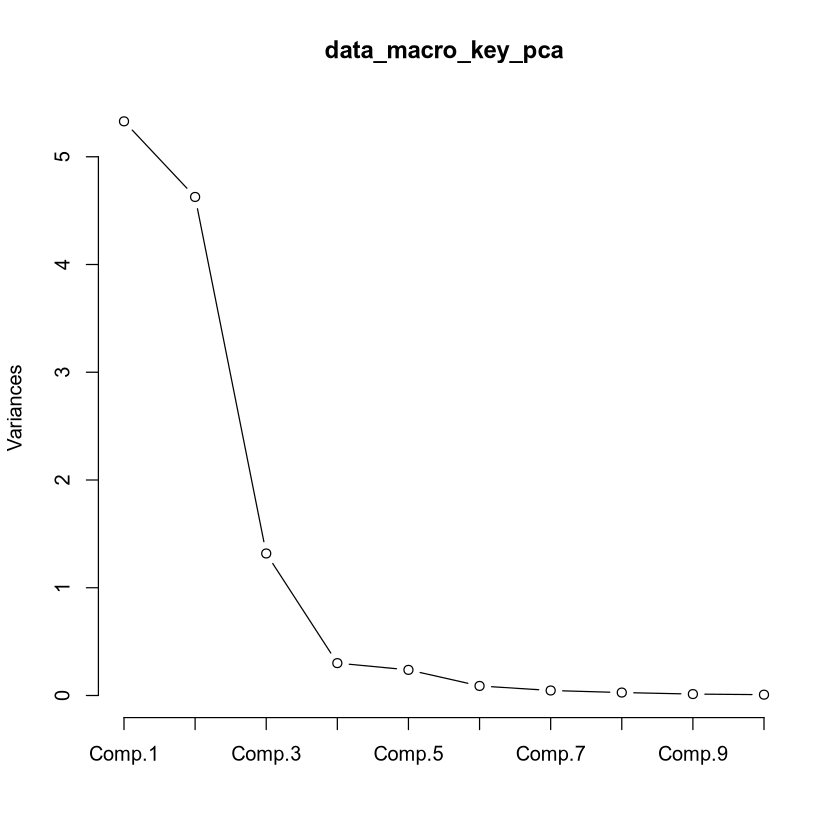

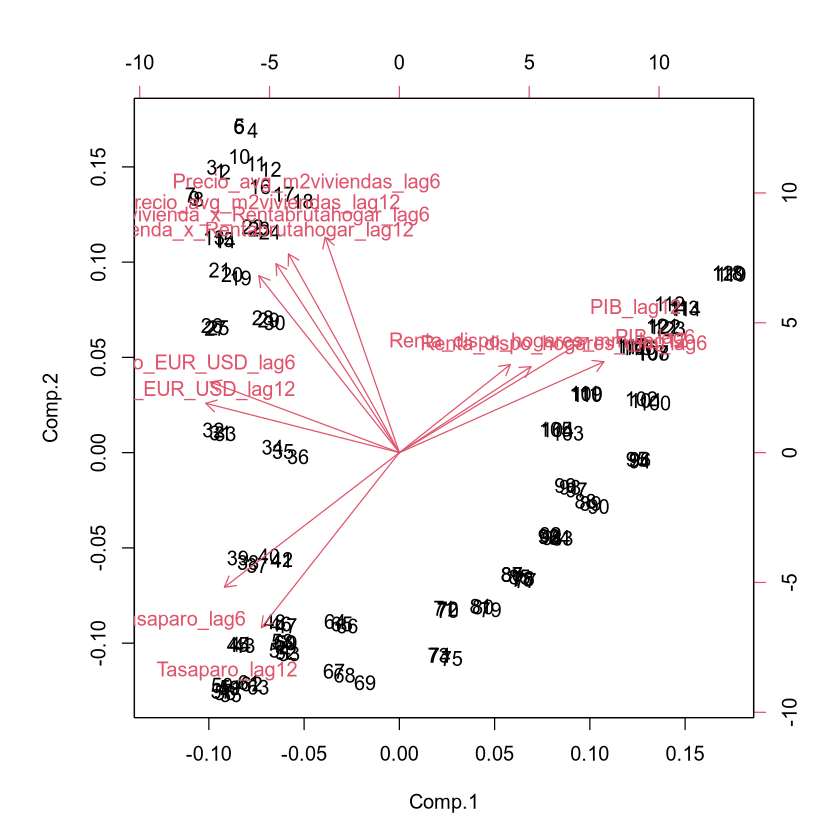

In [27]:
data_macro_key_pca <- princomp(
  ~ PIB_lag6
  + Tasaparo_lag6
    + Precio_avg_m2viviendas_lag6
    + Precio_vivienda_x_Rentabrutahogar_lag6
    + Tipo_cambio_EUR_USD_lag6
    + Renta_dispo_hogares_mm_lag6
    + PIB_lag12
    + Tasaparo_lag12
    + Precio_avg_m2viviendas_lag12
    + Precio_vivienda_x_Rentabrutahogar_lag12
    + Tipo_cambio_EUR_USD_lag12
    + Renta_dispo_hogares_mm_lag12,
  cor = TRUE, data = data_macro
)
summary(data_macro_key_pca)
loadings(data_macro_key_pca)
plot(data_macro_key_pca, type = "lines")
head(data_macro_key_pca$scores)
biplot(data_macro_key_pca)

### <font color='#3d59c6'>  CONSTRUCCIÓN MODELO </font>

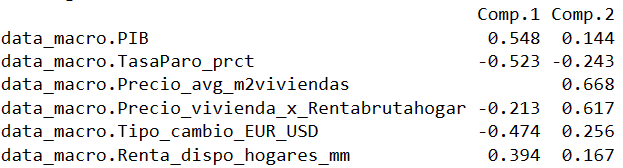

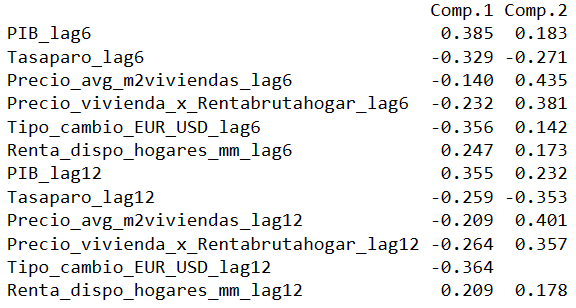

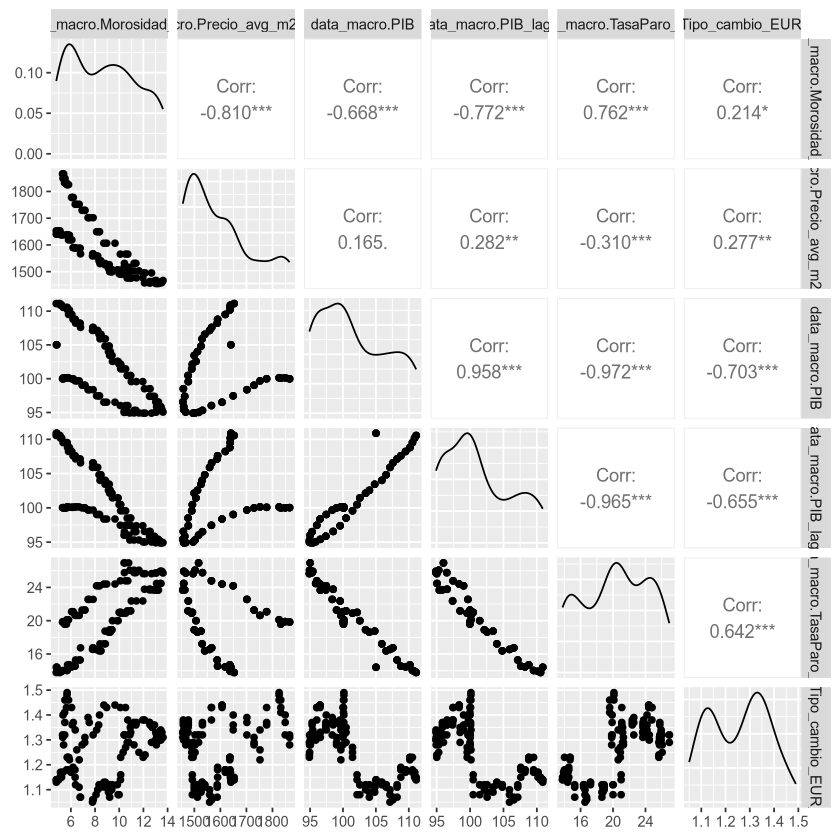

In [28]:
# Variables seleccionadas por PCA:
data_macro_preml <- data.frame(
  data_macro$Morosidad_prct,
  data_macro$Precio_avg_m2viviendas,
  data_macro$PIB,
  data_macro$PIB_lag6,
  data_macro$TasaParo_prct,
  data_macro$Tipo_cambio_EUR_USD_lag12
)
ggpairs(data_macro_preml)

In [29]:
data_macro_ml <- data_macro
set.seed(123)
inTrain <- createDataPartition(
  y = data_macro$Morosidad_prct,
  p = 0.6,
  list = FALSE,
  times = 1
)

data_train <- data_macro_ml[inTrain, ]
data_test <- data_macro_ml[-inTrain, ]

### <font color='#3d59c6'>  MODELO LINEAL MULTIPLE </font>

In [30]:
modelo_lm <- lm(Morosidad_prct ~ Precio_avg_m2viviendas + PIB_lag6, data = data_train) # Entrenamos el modelo
summary(modelo_lm)


Call:
lm(formula = Morosidad_prct ~ Precio_avg_m2viviendas + PIB_lag6, 
    data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02308 -0.27320 -0.01509  0.28701  1.12434 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            64.1019728  1.0877013   58.93   <2e-16 ***
Precio_avg_m2viviendas -0.0146993  0.0004799  -30.63   <2e-16 ***
PIB_lag6               -0.3164846  0.0104385  -30.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4333 on 72 degrees of freedom
Multiple R-squared:  0.9743,	Adjusted R-squared:  0.9736 
F-statistic:  1365 on 2 and 72 DF,  p-value: < 2.2e-16


### <font color='#3d59c6'>  COMPROBAMOS EL RESTO DE SUPUESTOS: </font>


### <font color='#3d59c6'>  ***Normalidad:*** </font>


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelo_lm$residuals
D = 0.056784, p-value = 0.7959


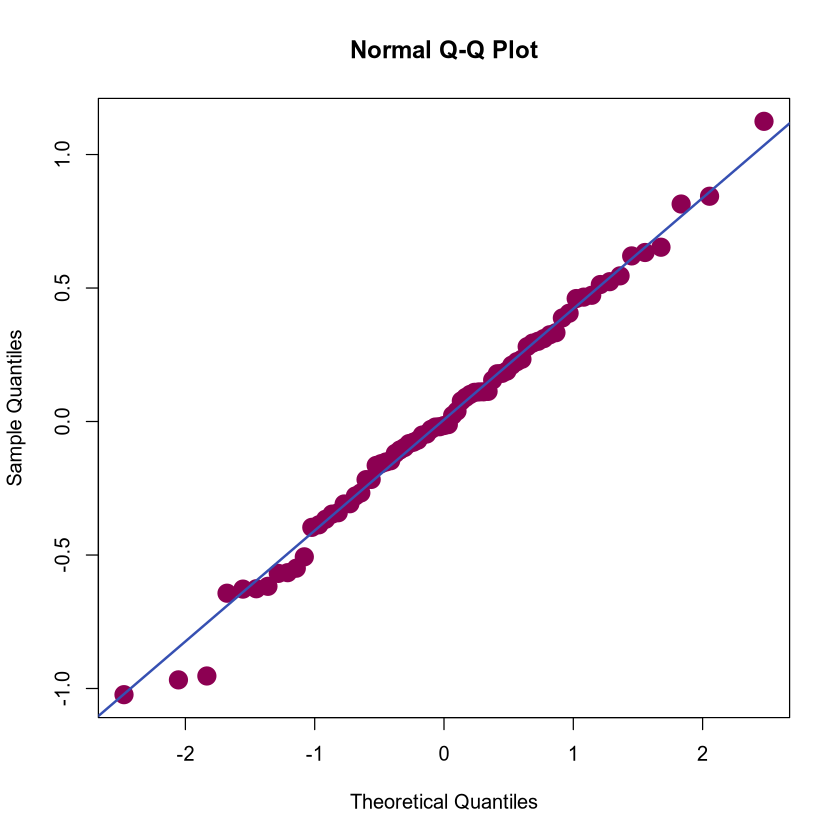

In [31]:
# Visualization
qqnorm(modelo_lm$residuals, pch = 19, col = "#8c0052", cex = 2)
qqline(modelo_lm$residuals, col = "#3650b2", lwd = 2)

# Statistical Test
lillie.test(modelo_lm$residuals)

### <font color='#3d59c6'>  ***Homocedasticidad:*** </font>

- Visualización: Residuos vs valores ajustados.

- Prueba estadística: la prueba de Breusch Pagan


	studentized Breusch-Pagan test

data:  modelo_lm
BP = 23.229, df = 2, p-value = 9.033e-06


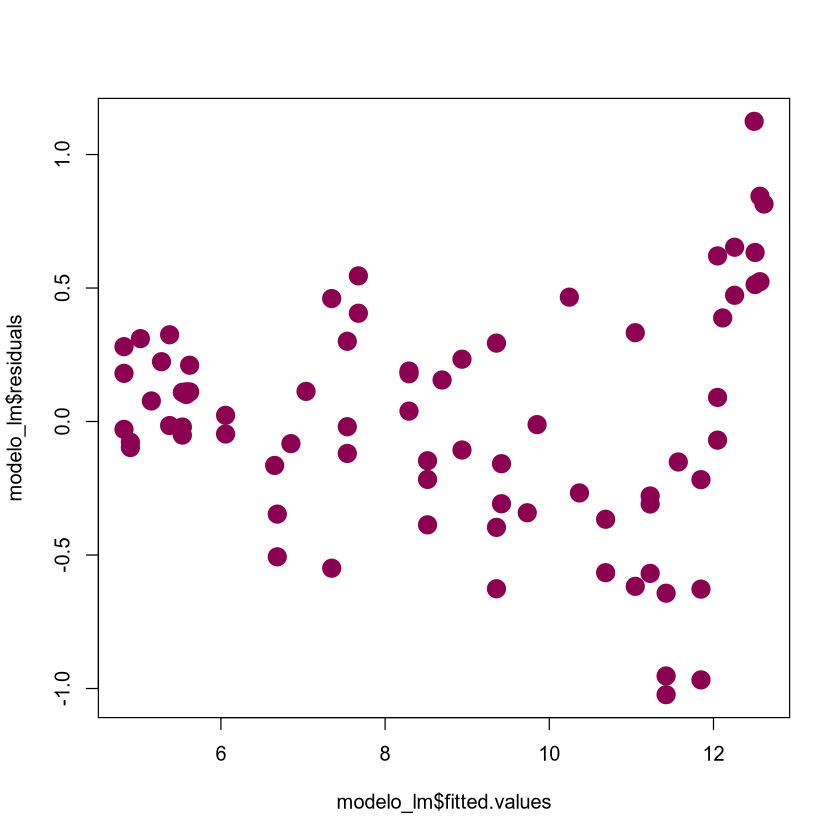

In [32]:
# Visualization
plot(modelo_lm$fitted.values, modelo_lm$residuals, pch = 19, col = "#8c0052", cex = 2)

# Test Breusch-Pagan
bptest(modelo_lm)

### <font color='#3d59c6'>  ***Autocorrelación:*** </font>

- Visualización: Residual vs Orden de toma de observaciones.
- Prueba estadística: la prueba de Durbin-Watson.


	Durbin-Watson test

data:  modelo_lm
DW = 0.55651, p-value = 9.903e-15
alternative hypothesis: true autocorrelation is not 0


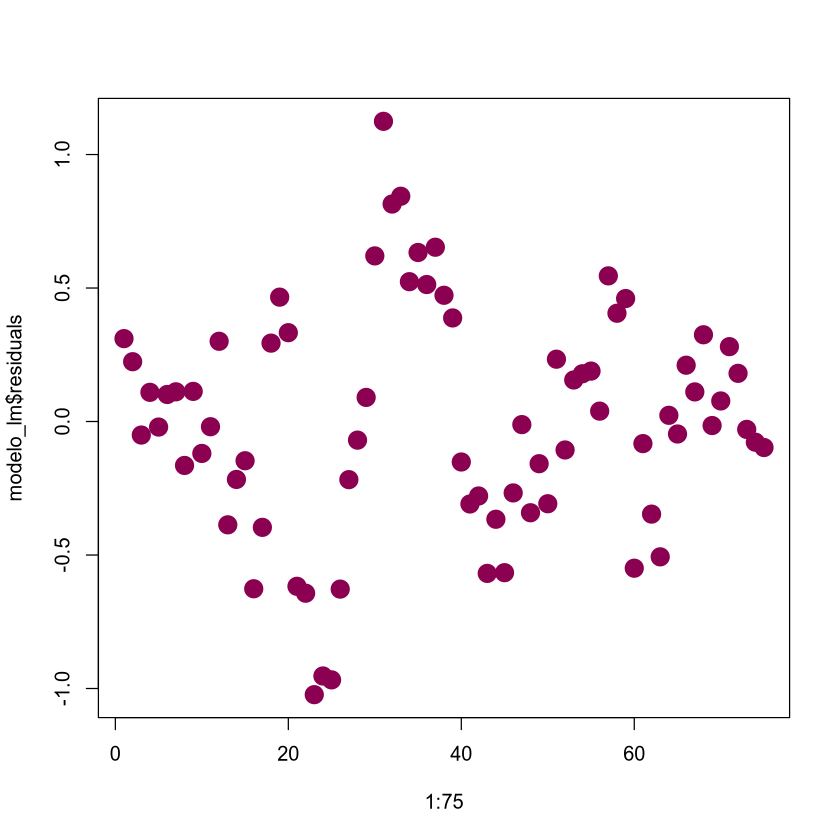

In [33]:
# Visualization
plot(1:75, modelo_lm$residuals, pch = 19, col = "#8c0052", cex = 2)

# Statistical Test
dwtest(modelo_lm, alternative = c("two.sided"))

### <font color='#3d59c6'>  ***Media de errores:*** </font>

In [34]:
mean(modelo_lm$residuals)

[1] -2.574131e-17

### <font color='#3d59c6'>  ***Detección de Outliers:*** </font>

Una tarea más es detectar si hay algún Outlier en el conjunto de datos dado. Porque si hay un Outlier, el resultado obtenido anteriormente no será confiable. Por tanto, existe la necesidad de detectar un Outlier.

Visualización y Prueba estadística: la **Distancia de Cook** (estima la influencia de un punto en la regresión)

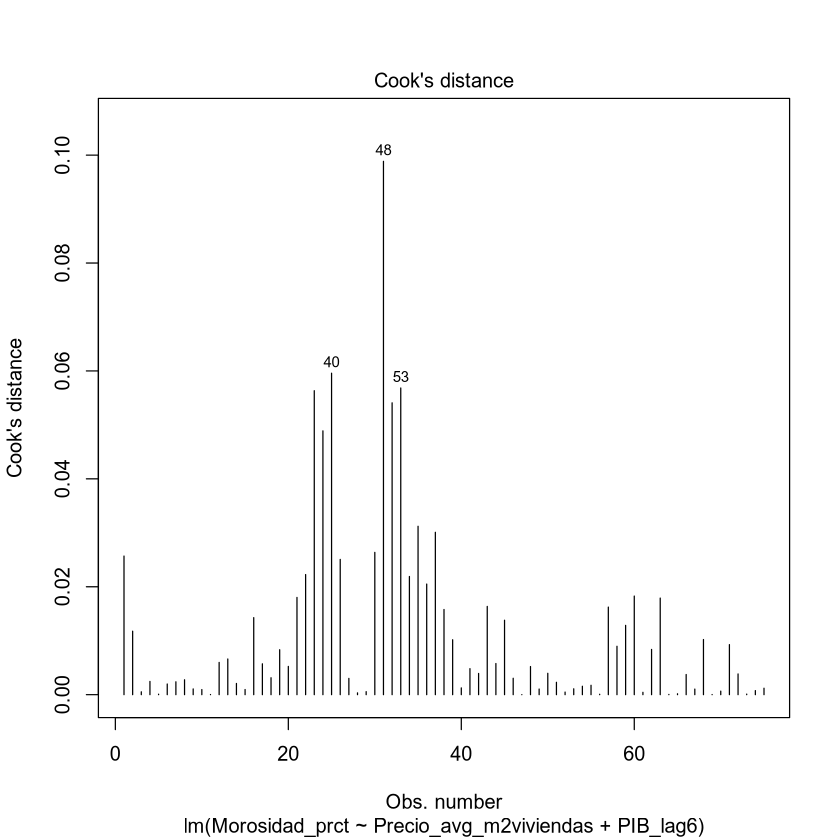

In [35]:
# Visualization (Cook's distance plot)
plot(modelo_lm, 4)

## <font color='#3d59c6'>  PREDICCIONES </font>

El modelo de regresión lineal simple está listo.

A partir del conjunto de datos TEST verificamos el rendimiento ya que es un conjunto de datos "ciego", es decir, determinA qué tan bien funcionará este modelo en datos no vistos.

Esto se hará nuevamente mediante dos métodos:

- Visualización: el gráfico de salario previsto frente a salario real para el conjunto de datos TEST.
- Medida estadística: R2, RMSE, MAE ayuda.

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.9847096,0.3693448,0.2981452


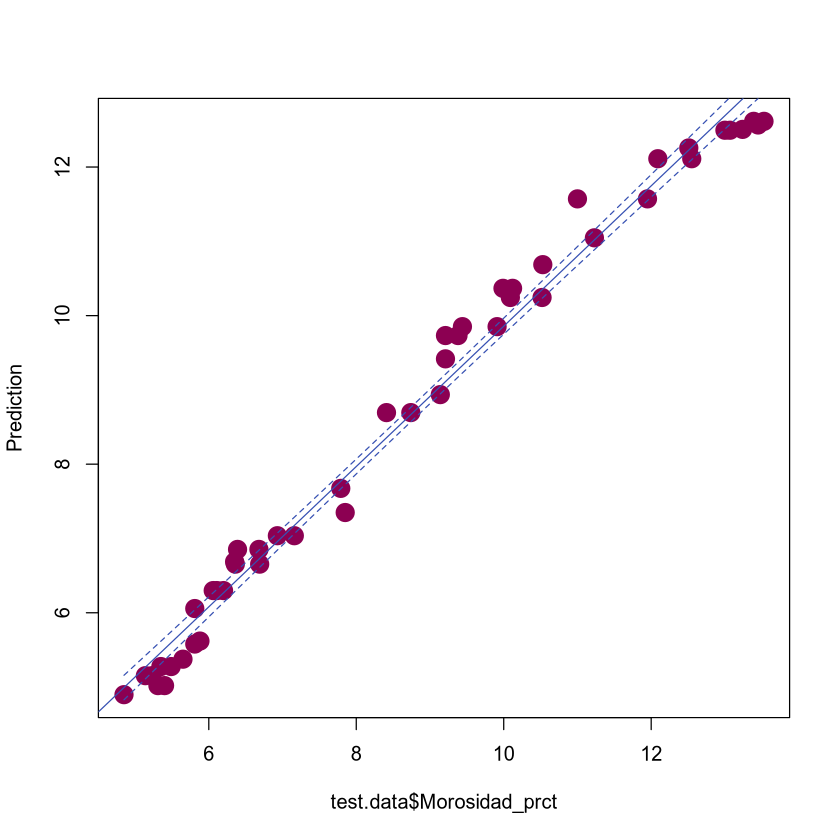

In [36]:
# Making prediction
prediction <- predict(modelo_lm, data_test)

### Visualization
plot(data_test$Morosidad_prct, prediction, xlab = "test.data$Morosidad_prct", ylab = "Prediction", pch = 19, col = "#8c0052", cex = 2)

# add fitted regression line
lm.out <- lm(prediction ~ Morosidad_prct, data = data_test)
newx <- seq(min(data_test$Morosidad_prct), max(data_test$Morosidad_prct), by = 0.05)
conf_interval <- predict(lm.out, newdata = data.frame(Morosidad_prct = newx), interval = "confidence", level = 0.95)
abline(lm.out, col = "#3650b2")

# add conf_interval lines
lines(newx, conf_interval[, 2], col = "#3650b2", lty = 2)
lines(newx, conf_interval[, 3], col = "#3650b2", lty = 2)

# Statistical Measure
data.frame(
  R2 = R2(prediction, data_test$Morosidad_prct),
  RMSE = RMSE(prediction, data_test$Morosidad_prct),
  MAE = MAE(prediction, data_test$Morosidad_prct)
)

## <font color='#3d59c6'>  ANEXO </font>
### <font color='#3d59c6'>  PCA con variables lag y no lag </font>

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.7585566 2.5156417 1.3561391 0.64087112 0.55688840
Proportion of Variance 0.4476256 0.3722620 0.1081831 0.02415975 0.01824263
Cumulative Proportion  0.4476256 0.8198875 0.9280706 0.95223040 0.97047302
                           Comp.6     Comp.7      Comp.8      Comp.9
Standard deviation     0.41497944 0.37244313 0.279209896 0.204035644
Proportion of Variance 0.01012988 0.00815964 0.004585774 0.002448856
Cumulative Proportion  0.98060290 0.98876254 0.993348318 0.995797173
                           Comp.10     Comp.11      Comp.12      Comp.13
Standard deviation     0.153985555 0.134485640 0.1156841694 0.0749378474
Proportion of Variance 0.001394797 0.001063905 0.0007872251 0.0003303342
Cumulative Proportion  0.997191970 0.998255875 0.9990431004 0.9993734346
                            Comp.14      Comp.15      Comp.16      Comp.17
Standard deviation     0.067717


Loadings:
                                        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
PIB                                      0.293  0.204  0.163         0.180
TasaParo_prct                           -0.260 -0.249 -0.179        -0.176
Precio_avg_m2viviendas                  -0.147  0.355  0.111              
Precio_vivienda_x_Rentabrutahogar       -0.244  0.273               -0.161
Tipo_cambio_EUR_USD                     -0.304               -0.727  0.171
Renta_dispo_hogares_mm                   0.197  0.202 -0.478              
PIB_lag6                                 0.264  0.247  0.173         0.164
Tasaparo_lag6                           -0.201 -0.309 -0.183        -0.160
Precio_avg_m2viviendas_lag6             -0.211  0.319                     
Precio_vivienda_x_Rentabrutahogar_lag6  -0.270  0.256               -0.190
Tipo_cambio_EUR_USD_lag6                -0.314        -0.115 -0.127  0.738
Renta_dispo_hogares_mm_lag6              0.169  0.211 -0.498              
Tasaparo_lag12

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17
1,-4.398334,3.559532,1.8701788,-0.7039819,0.08080629,0.3042150,0.0233542,0.2341984,-0.4976520,-0.12015507,0.16784789,0.1243276,0.15010953,-0.04319552,0.083804455,0.10162910,-0.10491385
2,-4.185214,3.555325,1.9505652,-0.5718128,-0.02661581,0.4992143,-0.5037599,0.1550372,-0.4779513,-0.07959685,0.17954413,0.1215316,0.13745260,-0.02869047,0.067687425,0.09516037,-0.06926437
3,-4.307937,3.554328,1.8976271,-0.3581382,0.23450667,0.5141419,-0.5607542,0.1500153,-0.4611520,-0.06984747,0.16545691,0.1146580,0.13821865,-0.02399659,0.062566267,0.09432779,-0.05394176
4,-3.563378,4.427978,-0.8302225,-0.2383465,0.21325367,0.8784611,-0.5781113,-0.2738207,-0.2739584,0.01727666,-0.05559902,0.1198853,-0.02881690,0.01965101,0.017234195,-0.06688217,-0.01490421
5,-3.490619,4.405195,-0.8242388,0.5752560,0.30854116,0.9242823,-0.8191710,-0.3132953,-0.2701818,0.02942923,-0.07740796,0.1171023,-0.03738289,0.03127128,0.005617434,-0.06257921,0.02589836
6,-3.392600,4.388161,-0.7990983,1.0057898,0.16669545,0.8631374,-0.7390099,-0.3078081,-0.2930535,0.01207426,-0.08692261,0.1230657,-0.04011336,0.03016620,0.007879216,-0.05510713,0.02993905


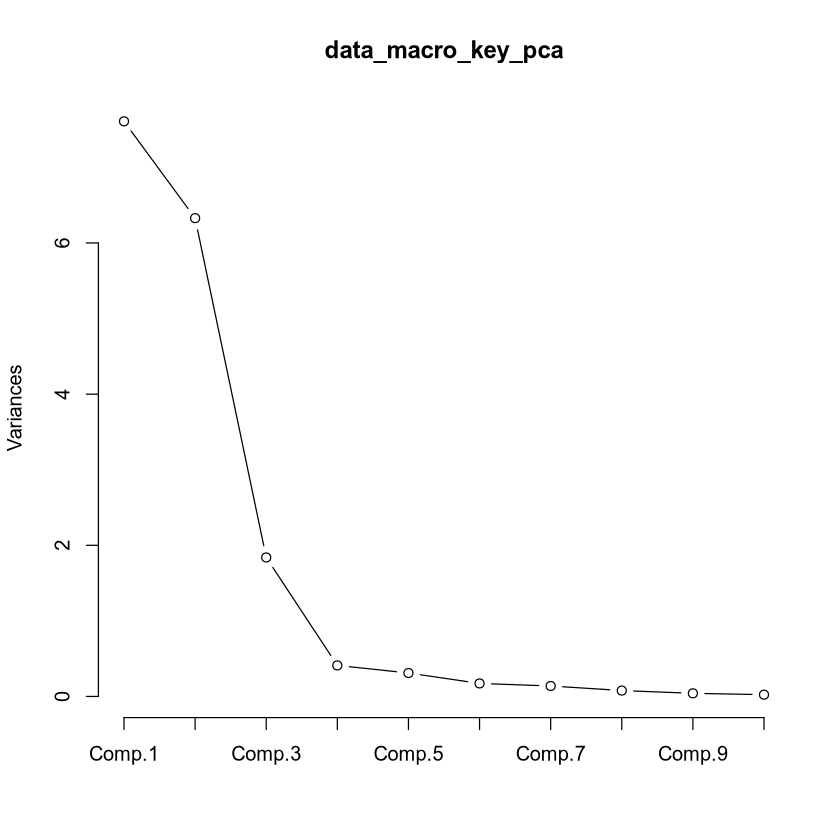

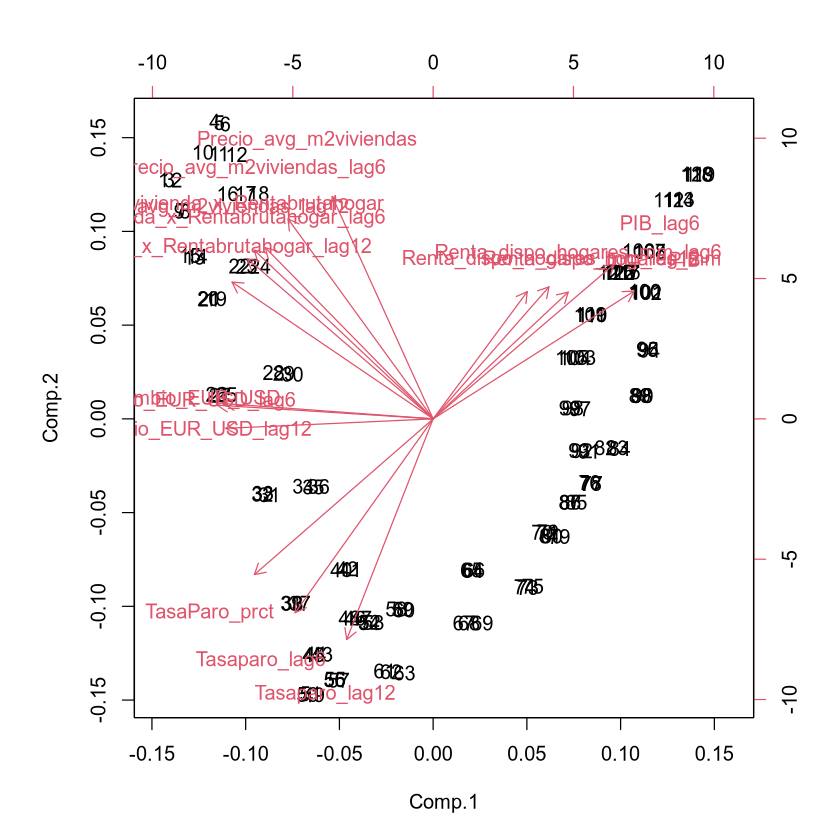

In [37]:
data_macro_key_pca <- princomp(
  ~ PIB
  + TasaParo_prct
    + Precio_avg_m2viviendas
    + Precio_vivienda_x_Rentabrutahogar
    + Tipo_cambio_EUR_USD
    + Renta_dispo_hogares_mm
    + PIB_lag6
    + Tasaparo_lag6
    + Precio_avg_m2viviendas_lag6
    + Precio_vivienda_x_Rentabrutahogar_lag6
    + Tipo_cambio_EUR_USD_lag6
    + Renta_dispo_hogares_mm_lag6
    + Tasaparo_lag12
    + Precio_avg_m2viviendas_lag12
    + Precio_vivienda_x_Rentabrutahogar_lag12
    + Tipo_cambio_EUR_USD_lag12
    + Renta_dispo_hogares_mm_lag12,
  cor = TRUE, data = data_macro
)
summary(data_macro_key_pca)
loadings(data_macro_key_pca)
plot(data_macro_key_pca, type = "lines")
head(data_macro_key_pca$scores)
biplot(data_macro_key_pca)